In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

## Data / Goal
The goal is to predict which customers will buy a SUV, so a business can target social media adverts accordingly. The dataset has 400 observations. The independent variables are age and salary. The dependent variable is binary, with 1 = bought SUV, and 0 = did not buy SUV.

In [8]:
dataset = pd.read_csv('data\Social_Network_Ads.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

## Exploratory Data Analysis
Correlation between age and salary is low, although individuals under the age of 30 tend not to earn very high salaries. It also appears people under the age of 30 tend not to buy SUV's (probably because they are less likely to have offspring). There does not appear to be many outliers.

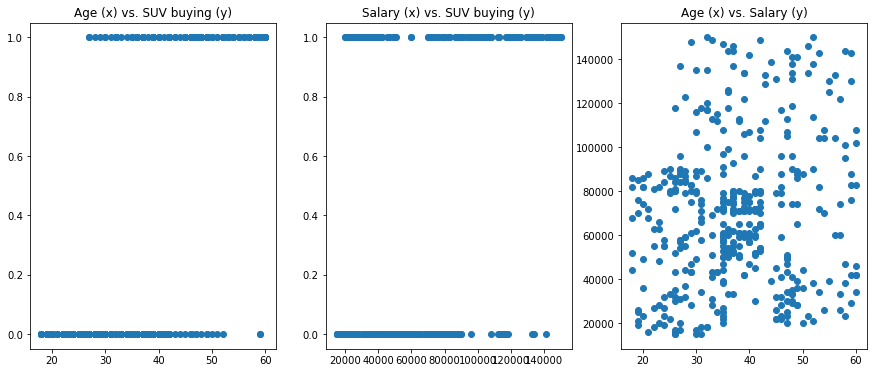

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize = (15,6))
ax1.scatter(X[:,0], y)
ax1.set_title("Age (x) vs. SUV buying (y)")
ax2.scatter(X[:,1], y)
ax2.set_title("Salary (x) vs. SUV buying (y)")
ax3.scatter(X[:,0],X[:,1])
ax3.set_title("Age (x) vs. Salary (y)")
plt.tight_layout
plt.show()

## GaussianNB
**Preprocessing**: The data is not standardized, as this happens internally in GaussianNB. The dataset is split into 75% training and 25% test.

**Approach**: Bayes classification is based around Bayes theory. In classification problems the probability of a data point 'd' being in class 'c' is a function of the the probability of generating 'd' given 'c' and the probability of occurance of class 'c'. GaussianNB assumes that the underlying features are normally distributed, and conditionally independent. At prediction time, the closer a data point is to the mean of the features for a specific class, the more likely it belongs to that class.

**Advantages/disadvantages**: Bayes approaches are simple and powerful. They perform very well with multiple classes and high dimensions. They don't rely on complex algorithms to solve, and computations increase linearly. In my experience it often performs as well as much more complex classification models. There are no hyperparameters that need adjusting which need tuning. However, the underlying assumptions are often not satisfied (especially conditionally independence), and the quality of input data needs to be good (given no hyperparameters to tune).

**Results**: The accuracy of the model is 90%. The boundary decision function is smooth and non-linear, and does a good job at dividing up the feature space.

In [10]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=0)

pipeline = Pipeline([('clf', GaussianNB())])
model = pipeline.fit(X_train, y_train)
predictions = model.predict(X_test)

cm = confusion_matrix(y_test,predictions)
print(cm)
accuracy_score(y_test,predictions)


[[65  3]
 [ 7 25]]


0.9

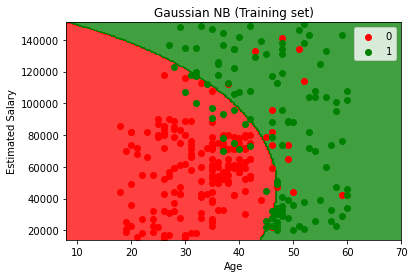

In [11]:
X_set = X_train
y_set = y_train
X1, X2 = np.meshgrid(np.linspace(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, num=200),
                     np.linspace(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, num=200))
plt.contourf(X1, X2, model.predict((np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Gaussian NB (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

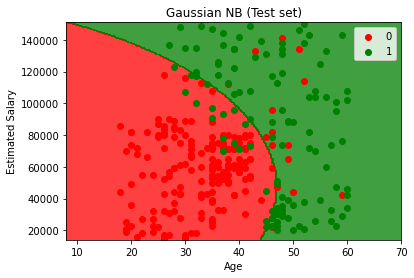

In [12]:
X_set = X_train
y_set = y_train
X1, X2 = np.meshgrid(np.linspace(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, num=200),
                     np.linspace(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, num=200))
plt.contourf(X1, X2, model.predict((np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Gaussian NB (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()